<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/1%20-%20Le%20Basi%20di%20Tensorflow/carta_sasso_forbice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-datasets

In [0]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import image

In [0]:
NUM_SAMPLES = 300

In [0]:
images = []
labels = []

ds_train = tfds.load('rock_paper_scissors', split='train', shuffle_files=True)

for i, example in enumerate(tfds.as_numpy(ds_train)):

  if(i>=NUM_SAMPLES):
    break

  img = example["image"]
  img = image.resize(img, (48, 48))
  img = image.rgb_to_grayscale(img)

  images.append(img)
  labels.append(example["label"])

images = np.array(images)
labels = np.array(labels)

In [7]:
print(images.shape)
print(labels.shape)

(300, 48, 48, 1)
(300,)


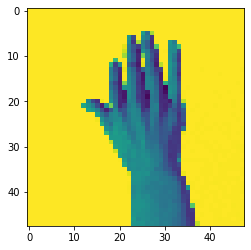

In [10]:
plt.imshow(images[0][:,:,0])

In [19]:
images.shape

(300, 48, 48, 1)

In [0]:
X = images/255

In [21]:
X = X.reshape(images.shape[0], images.shape[1]*images.shape[2])
X.shape

(300, 2304)

In [39]:
y = tf.one_hot(labels, 3).numpy()
y.shape

(300, 3)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
model.fit(X, y, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4639 - accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1317 - accuracy: 0.3700
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0755 - accuracy: 0.4333
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0449 - accuracy: 0.4367
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0304 - accuracy: 0.4467
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9323 - accuracy: 0.5700
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9619 - accuracy: 0.5200
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8469 - accuracy: 0.6200
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8159 - accuracy: 0.6567
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8678 - accuracy: 0.6067
Epoch 11/